In [ ]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots.
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

ModuleNotFoundError: No module named 'thinkplot'

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above.
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching.
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data.

Note: you'll have to look at the units to ensure you get it right.

In [12]:
# part 1
# make new column for gdp per person
dfLE["GDPperCapita"] = dfLE["GDP"] / dfLE["Population"]

# show only country name and that new column
print("country and gdp per capita (10 random rows)")
print(dfLE[["Country", "GDPperCapita"]].sample(10))


country and gdp per capita (10 random rows)
                                           Country  GDPperCapita
74                                         Hungary   8020.910601
160                                       SriLanka    828.792356
133                                         Poland   4820.882331
93                                         Lebanon   4818.958386
28                                        Cambodia    508.830482
1                                          Albania   1674.441147
144                                          Samoa   2019.495051
180  UnitedKingdomofGreatBritainandNorthernIreland           NaN
68                                       Guatemala   2981.428737
27                                       CaboVerde   2271.693565


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution.
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff.
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

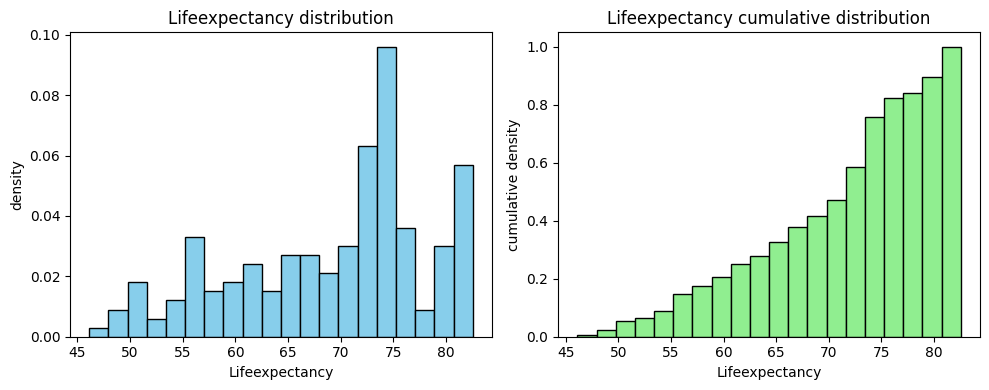

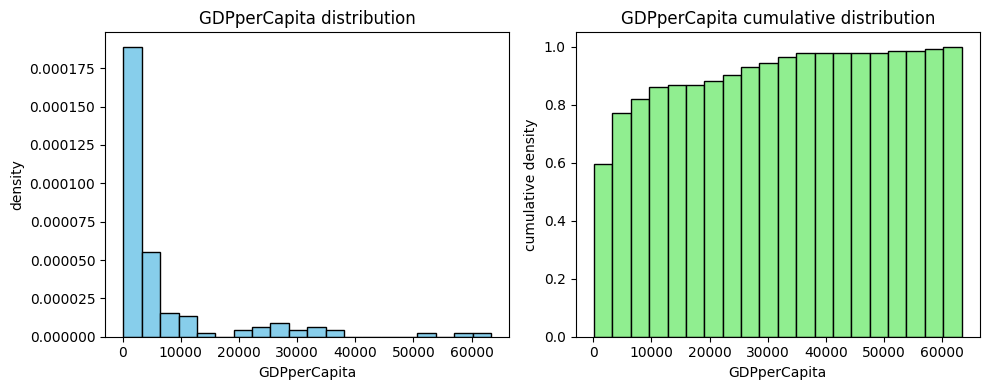

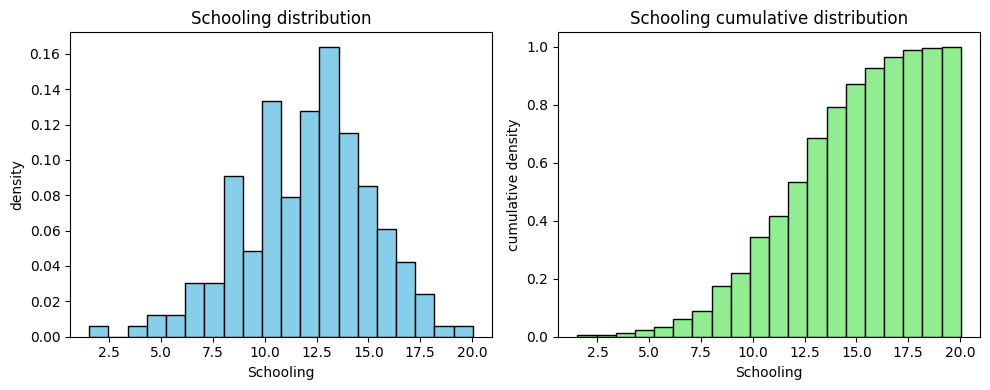

In [13]:
# part 2
# show both normal (density) and cumulative plots for few numeric columns

import matplotlib.pyplot as plt

# choose some numeric columns
cols = ["Lifeexpectancy", "GDPperCapita", "Schooling"]

for c in cols:
    plt.figure(figsize=(10,4))

    # normal / density plot
    plt.subplot(1,2,1)
    plt.hist(dfLE[c].dropna(), bins=20, density=True, color="skyblue", edgecolor="black")
    plt.title(c + " distribution")
    plt.xlabel(c)
    plt.ylabel("density")

    # cumulative plot
    plt.subplot(1,2,2)
    plt.hist(dfLE[c].dropna(), bins=20, density=True, cumulative=True,
             color="lightgreen", edgecolor="black")
    plt.title(c + " cumulative distribution")
    plt.xlabel(c)
    plt.ylabel("cumulative density")

    plt.tight_layout()
    plt.show()


### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution.
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada.
</ul>

### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how.
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it.
</ul>

mean of schooling: 12.03
std of schooling: 3.1


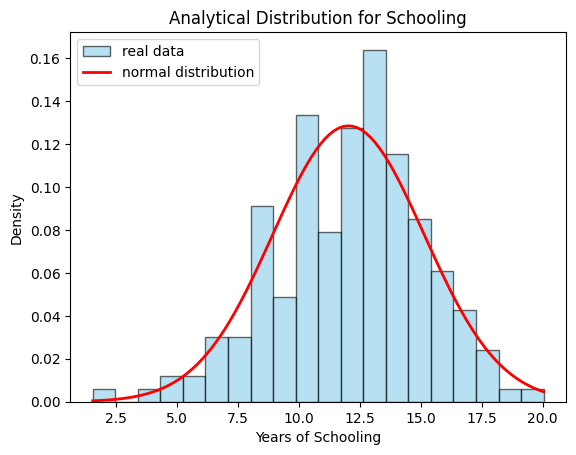

Percent of countries within 1 year of Canada: 12.03 %


In [14]:
# part 3 analytical distribution for schooling

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# i think schooling looks like a normal distribution (bell shape)
# so i will use normal distribution
mean_school = dfLE["Schooling"].mean()
std_school = dfLE["Schooling"].std()

print("mean of schooling:", round(mean_school,2))
print("std of schooling:", round(std_school,2))

# make x values and normal pdf line
x = np.linspace(dfLE["Schooling"].min(), dfLE["Schooling"].max(), 100)
y = stats.norm.pdf(x, mean_school, std_school)

# plot histogram of real data and red normal curve
plt.hist(dfLE["Schooling"].dropna(), bins=20, density=True, color="skyblue", edgecolor="black", alpha=0.6, label="real data")
plt.plot(x, y, color="red", linewidth=2, label="normal distribution")
plt.title("Analytical Distribution for Schooling")
plt.xlabel("Years of Schooling")
plt.ylabel("Density")
plt.legend()
plt.show()

# find canada schooling value
canada_school = dfLE[dfLE["Country"]=="Canada"]["Schooling"].values[0]

# percent of countries within 1 year of canada
low = canada_school - 1
high = canada_school + 1

prob = stats.norm.cdf(high, mean_school, std_school) - stats.norm.cdf(low, mean_school, std_school)
print("Percent of countries within 1 year of Canada:", round(prob*100,2), "%")


### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise.
</ul>

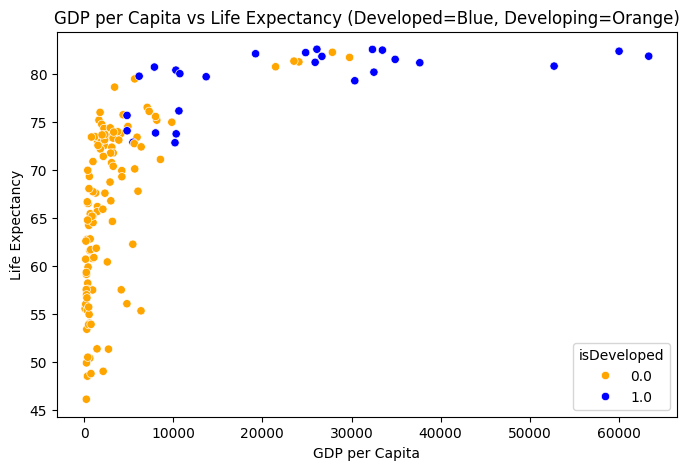

In [15]:
# part 4 visually find correlations
import matplotlib.pyplot as plt
import seaborn as sns

# make a simple scatter plot to see relation between GDPperCapita and Lifeexpectancy
plt.figure(figsize=(8,5))
sns.scatterplot(data=dfLE, x="GDPperCapita", y="Lifeexpectancy",
                hue="isDeveloped", palette=["orange", "blue"])
plt.title("GDP per Capita vs Life Expectancy (Developed=Blue, Developing=Orange)")
plt.xlabel("GDP per Capita")
plt.ylabel("Life Expectancy")
plt.show()


### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed.
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable.

In [16]:
# part 5 correlations

# separate developed and developing countries
dev = dfLE[dfLE["isDeveloped"] == 1]
notdev = dfLE[dfLE["isDeveloped"] == 0]

# find correlation with Lifeexpectancy
corr_dev = dev.corr(numeric_only=True)["Lifeexpectancy"].sort_values(ascending=False)
corr_notdev = notdev.corr(numeric_only=True)["Lifeexpectancy"].sort_values(ascending=False)

print("Top 3 correlations for Developed Countries:\n", corr_dev.head(4))
print("\nTop 3 correlations for Developing Countries:\n", corr_notdev.head(4))


Top 3 correlations for Developed Countries:
 Lifeexpectancy    1.000000
GDPperCapita      0.628680
Schooling         0.417589
GDP               0.372168
Name: Lifeexpectancy, dtype: float64

Top 3 correlations for Developing Countries:
 Lifeexpectancy    1.000000
Schooling         0.735940
BMI               0.694751
Diphtheria        0.650166
Name: Lifeexpectancy, dtype: float64


### 🧠 Analysis of Correlations

**Developed Countries:**
- The strongest correlations with Life Expectancy are **GDP per Capita (0.63)**, **Schooling (0.42)**, and **GDP (0.37)**.  
- These results make sense because countries with higher income and better education tend to have longer life spans.  
- This appears **causal**, since high income leads to better hospitals, healthcare systems, and education, all of which improve health.

**Developing Countries:**
- The strongest correlations are **Schooling (0.74)**, **BMI (0.69)**, and **Diphtheria immunization (0.65)**.  
- These are realistic, as education increases health awareness, and vaccines protect against deadly diseases.  
- The relationships are **partly causal**, since both education and immunization directly affect health outcomes.

---

### ⚖️ Differences Between Groups

1. **Income Effect (GDP per Capita):**  
   - In developing countries, extra income helps people meet basic needs like food, clean water, and shelter.  
   - In developed countries, these needs are already met, so extra income has a smaller effect on life expectancy.

2. **Health and Education:**  
   - In developing countries, vaccines and nutrition (BMI) have a strong impact on survival.  
   - In developed countries, education and healthcare systems are already strong, so lifestyle choices make more difference.

---

**To confirm these observations,** we would need real-world data about healthcare spending, literacy rates, and vaccine coverage in each country.
